# Initialize

In [34]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
# First, load the data
with open('temphum.txt') as f:
    text = f.readlines()

In [42]:
# split delimited columns into strings 
arr = []
x = []
y1, y2 = [], []
for line in text:
    values = line.split("\t")
    arr.append(values)
    x.append(datetime.strptime(values[0], '%a %b %d %H:%M:%S %Y').timestamp())
    y1.append(float(values[1]))
    y2.append(float(values[2]))

First, let's visualize the time chart to get the gist of the data.

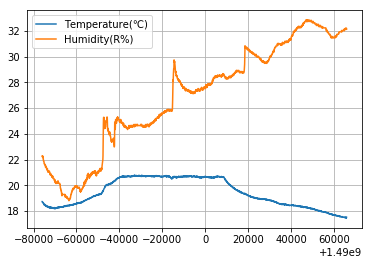

In [116]:
m = np.transpose(np.array([y1,y2]))
plt.plot(x, m)
plt.legend(('Temperature(℃)', 'Humidity(R%)'))
plt.grid()

Then, we can apply wavelet transform to the data.

In [136]:
from scipy import signal
widths = np.arange(1, 91)
w1 = signal.cwt(y1, signal.ricker, widths)
w2 = signal.cwt(y2, signal.ricker, widths)

Let's visualize the result.

We'll plot temperature and humidity into separate plots. Raw readings will be plotted on top of the wavelet images. It's gonna be complex, so embrace yourself:

Min & max:  89.7523857492 -3.29063145576
Min & max:  154.253090468 -13.3794016558


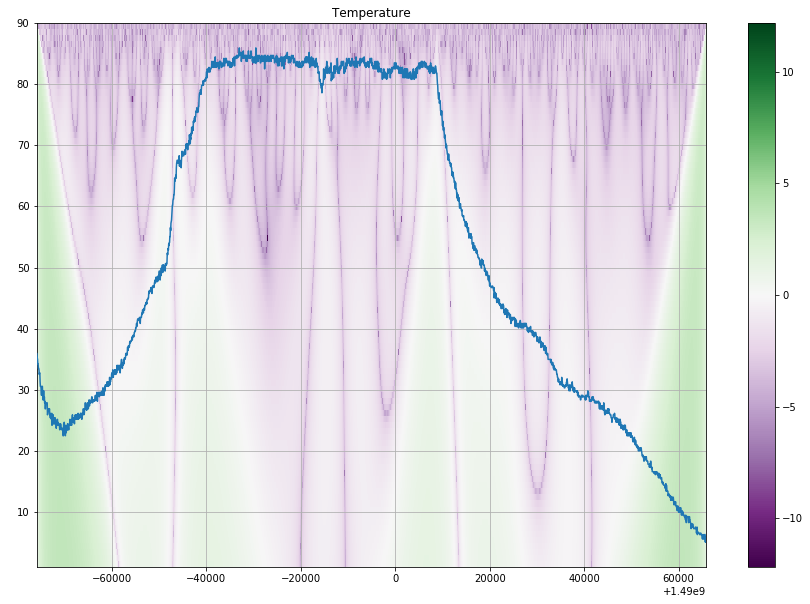

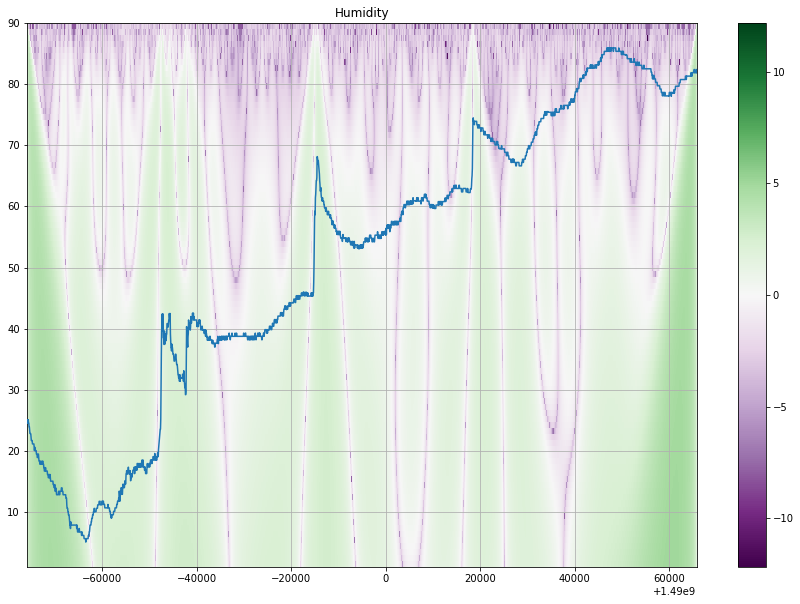

In [140]:
for data in [[y1, w1, 'Temperature'], [y2, w2, 'Humidity']]:
    w = data[1]
    print('Min & max: ', w.max(), w.min())
    logw = np.log(abs(w))
    #logw = w
    fig, axs = plt.subplots(1,1,figsize=(15,10))

    axs.imshow(logw, extent=[min(x), max(x), 1, np.shape(logw)[0]], cmap='PRGn', aspect='auto',
            vmax=abs(logw).max(), vmin=-abs(logw).max())
    plt.colorbar(im)
    axs.set_title(data[2])
    axs.grid()

    # Begin overlapped plot
    fig.canvas.draw()

    box = axs._position.bounds
    tmpax = fig.add_axes(box)
    tmpax.set_axis_off()

    tmpax.plot(x, data[0])
    tmpax.set_xlim(min(x), max(x))
    
    # Apparently we do not need to show() explicitly if axis.imshow is used.
    #plt.show()

## A peek into wavelet functions 

What the heck is going on with base functions?

Mexican hat wavelet is the most famous wavelet function, but one can use any other function as wavelet function
(provided that the function meets some requirements, such as an integration over the whole input variable shall be zero).
Haar wavelet is another base function and is the first wavelet ever introduced.

Let's plot Mexican hat wavelets with varying parameters.
Unfortunately SciPy signals doesn't have Haar wavelet in default function set.

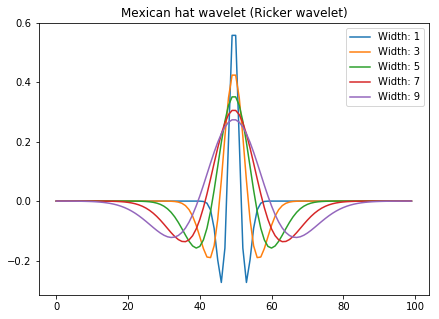

In [181]:
r = []
fig, axs = plt.subplots(1,1,figsize=(7,5))
for i in range(1,10,2):
    r1 = signal.ricker(100, widths[i])
    axs.plot(r1)
    r.append('Width: ' + str(i))
axs.legend(r)
axs.set_title('Mexican hat wavelet (Ricker wavelet)')